In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import accuracy_score, make_scorer, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler

import statsmodels.api as sm
import scipy.stats as stats

In [127]:
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [128]:
sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### Train on model with plain stats

In [147]:
model_df1 = pd.read_csv('../dataset/model_df1.csv')

In [130]:
print(model_df1.shape)

(21361, 74)


In [148]:
# Drop columns resulted from EDA
columns_to_drop = ['dribbling_MF_home', 'dribbling_SB_home', 'dribbling_ST_home','dribbling_W_home', 
      'dribbling_MF_away', 'dribbling_SB_away', 'dribbling_ST_away', 'dribbling_W_away']
model_df1 = model_df1.drop(columns = columns_to_drop)

In [132]:
model_df1.isna().sum()

match_api_id               0
dribbling_CB_home          0
dribbling_GK_home          0
sprint_speed_CB_home       0
sprint_speed_GK_home       0
sprint_speed_MF_home       0
sprint_speed_SB_home    1303
sprint_speed_ST_home       0
sprint_speed_W_home     1859
passing_CB_home            0
passing_GK_home            0
passing_MF_home            0
passing_SB_home         1303
passing_ST_home            0
passing_W_home          1859
shooting_CB_home           0
shooting_GK_home           0
shooting_MF_home           0
shooting_SB_home        1303
shooting_ST_home           0
shooting_W_home         1859
defence_CB_home            0
defence_GK_home            0
defence_MF_home            0
defence_SB_home         1303
defence_ST_home            0
defence_W_home          1859
goalkeeping_CB_home        0
goalkeeping_GK_home        0
goalkeeping_MF_home        0
goalkeeping_SB_home     1303
goalkeeping_ST_home        0
goalkeeping_W_home      1859
dribbling_CB_away          0
dribbling_GK_a

In [149]:
model_df1 = model_df1.dropna()

In [150]:
model_df1 = model_df1.drop(columns = 'match_api_id')

In [135]:
print(model_df1.shape)
model_df1.head()

(16318, 65)


,dribbling_CB_home,dribbling_GK_home,sprint_speed_CB_home,sprint_speed_GK_home,sprint_speed_MF_home,sprint_speed_SB_home,sprint_speed_ST_home,sprint_speed_W_home,passing_CB_home,passing_GK_home,passing_MF_home,passing_SB_home,passing_ST_home,passing_W_home,shooting_CB_home,shooting_GK_home,shooting_MF_home,shooting_SB_home,shooting_ST_home,shooting_W_home,defence_CB_home,defence_GK_home,defence_MF_home,defence_SB_home,defence_ST_home,defence_W_home,goalkeeping_CB_home,goalkeeping_GK_home,goalkeeping_MF_home,goalkeeping_SB_home,goalkeeping_ST_home,goalkeeping_W_home,dribbling_CB_away,dribbling_GK_away,sprint_speed_CB_away,sprint_speed_GK_away,sprint_speed_MF_away,sprint_speed_SB_away,sprint_speed_ST_away,sprint_speed_W_away,passing_CB_away,passing_GK_away,passing_MF_away,passing_SB_away,passing_ST_away,passing_W_away,shooting_CB_away,shooting_GK_away,shooting_MF_away,shooting_SB_away,shooting_ST_away,shooting_W_away,defence_CB_away,defence_GK_away,defence_MF_away,defence_SB_away,defence_ST_away,defence_W_away,goalkeeping_CB_away,goalkeeping_GK_away,goalkeeping_MF_away,goalkeeping_SB_away,goalkeeping_ST_away,goalkeeping_W_away,result
0,51.0,21.0,72.0,67.0,74.50,76.5,78.5,71.5,59.67,41.33,78.00,62.67,64.17,74.33,53.50,19.8,74.30,60.3,65.7,70.70,77.62,29.50,66.62,81.50,49.38,78.88,27.8,81.0,31.10,28.3,26.4,30.4,33.5,25.0,63.0,44.0,72.50,73.5,67.0,76.00,51.67,44.67,73.00,67.33,53.17,71.00,48.2,25.0,55.30,51.9,64.0,68.3,69.42,33.75,70.75,64.50,36.71,61.75,25.7,73.0,29.30,26.40,22.9,26.0,win
1,36.5,22.0,61.0,34.0,70.00,51.0,70.5,62.0,53.17,38.33,63.17,43.33,57.67,64.75,42.70,22.0,46.90,40.7,68.0,63.35,64.50,30.33,45.42,59.12,48.12,55.81,23.1,72.2,26.20,16.5,19.0,19.0,42.5,21.0,61.0,21.0,77.00,73.0,73.0,68.75,63.83,37.33,59.00,61.33,49.33,59.50,57.2,19.2,52.60,61.3,71.0,60.1,69.50,18.75,66.50,63.62,32.50,34.12,28.9,69.4,25.33,28.60,19.2,25.7,win
2,58.0,22.0,77.0,24.0,71.33,78.0,85.0,78.0,71.00,41.00,76.00,77.33,68.67,79.17,57.70,22.4,72.40,67.1,81.4,67.80,75.31,19.75,57.42,74.38,42.75,67.00,30.9,81.4,22.93,26.0,22.4,30.4,51.5,22.0,66.5,32.0,69.33,67.5,66.0,73.00,68.67,38.67,66.89,60.50,54.00,59.33,59.7,21.0,61.73,46.7,38.2,67.4,72.25,31.50,60.33,70.50,63.50,33.62,28.1,74.6,26.93,26.80,22.0,25.3,win
3,35.5,44.0,66.5,63.0,75.50,38.0,73.5,68.0,51.67,66.67,68.17,53.17,62.00,63.67,49.35,41.8,60.30,34.6,66.5,48.60,71.50,65.75,35.38,51.88,37.38,68.50,26.0,27.0,17.50,41.9,25.3,28.4,51.0,21.0,68.0,48.0,74.00,77.0,81.0,74.50,53.17,40.33,77.67,71.25,56.33,74.50,43.3,18.4,62.40,65.2,64.9,53.9,71.88,24.50,68.88,74.50,28.25,65.38,23.7,80.4,30.00,28.75,16.5,28.9,win
4,55.0,22.0,75.0,52.0,71.67,64.0,64.0,78.5,71.00,38.33,64.78,49.33,48.00,69.50,49.90,19.2,57.47,49.8,61.4,71.30,80.38,29.00,62.75,47.75,39.75,40.50,29.5,77.6,28.67,23.2,23.0,25.0,53.0,22.0,69.5,57.0,80.00,80.5,84.0,69.50,65.00,37.00,74.78,70.50,65.67,63.83,52.9,19.2,69.93,61.2,65.2,67.1,77.50,29.25,66.92,72.62,37.75,60.38,28.8,67.2,29.40,28.60,26.2,28.3,tie


In [136]:
def get_importance(df, target):
    '''
    Train a Random Forest Classifier on the given DataFrame `df` to predict the `target` column. 
    Show confusion matrix and plot feature importance     
    
    Args: df(dataframe): dataframe in format that fits Random Forest Classifier
          target(string): dependent variable
    '''
        
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop(columns=target), df[target], test_size=0.25, random_state=47)
    
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)

    y_pred = rf_model.predict(X_test)
    feature_importances = rf_model.feature_importances_
    features = X_train.columns
    
    print(classification_report(y_test,y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=rf_model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)

    fig, ax = plt.subplots(figsize=(2, 2))  
    disp.plot(ax=ax,cmap=plt.cm.Blues, colorbar = False)  
    plt.grid(False)
    plt.show()  
    
    feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
    sorted_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    sorted_feature_importance_df = sorted_feature_importance_df.reset_index(drop = True)

    plt.figure(figsize=(12, len(sorted_feature_importance_df)*0.2))
    bars = plt.barh(sorted_feature_importance_df['Feature'], sorted_feature_importance_df['Importance'], color='lavender')
    for bar in bars:
        plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.4f}', va='center')

    plt.xticks(rotation=0) 
    plt.gca().invert_yaxis()
    plt.xlim(0, 0.05)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances in Random Forest')
    plt.tight_layout()
    plt.show()
    
    return sorted_feature_importance_df

              precision    recall  f1-score   support

        lose       0.46      0.45      0.45      1158
         tie       0.29      0.04      0.06      1027
         win       0.54      0.80      0.64      1895

    accuracy                           0.51      4080
   macro avg       0.43      0.43      0.39      4080
weighted avg       0.45      0.51      0.44      4080



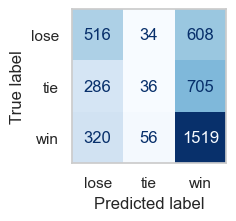

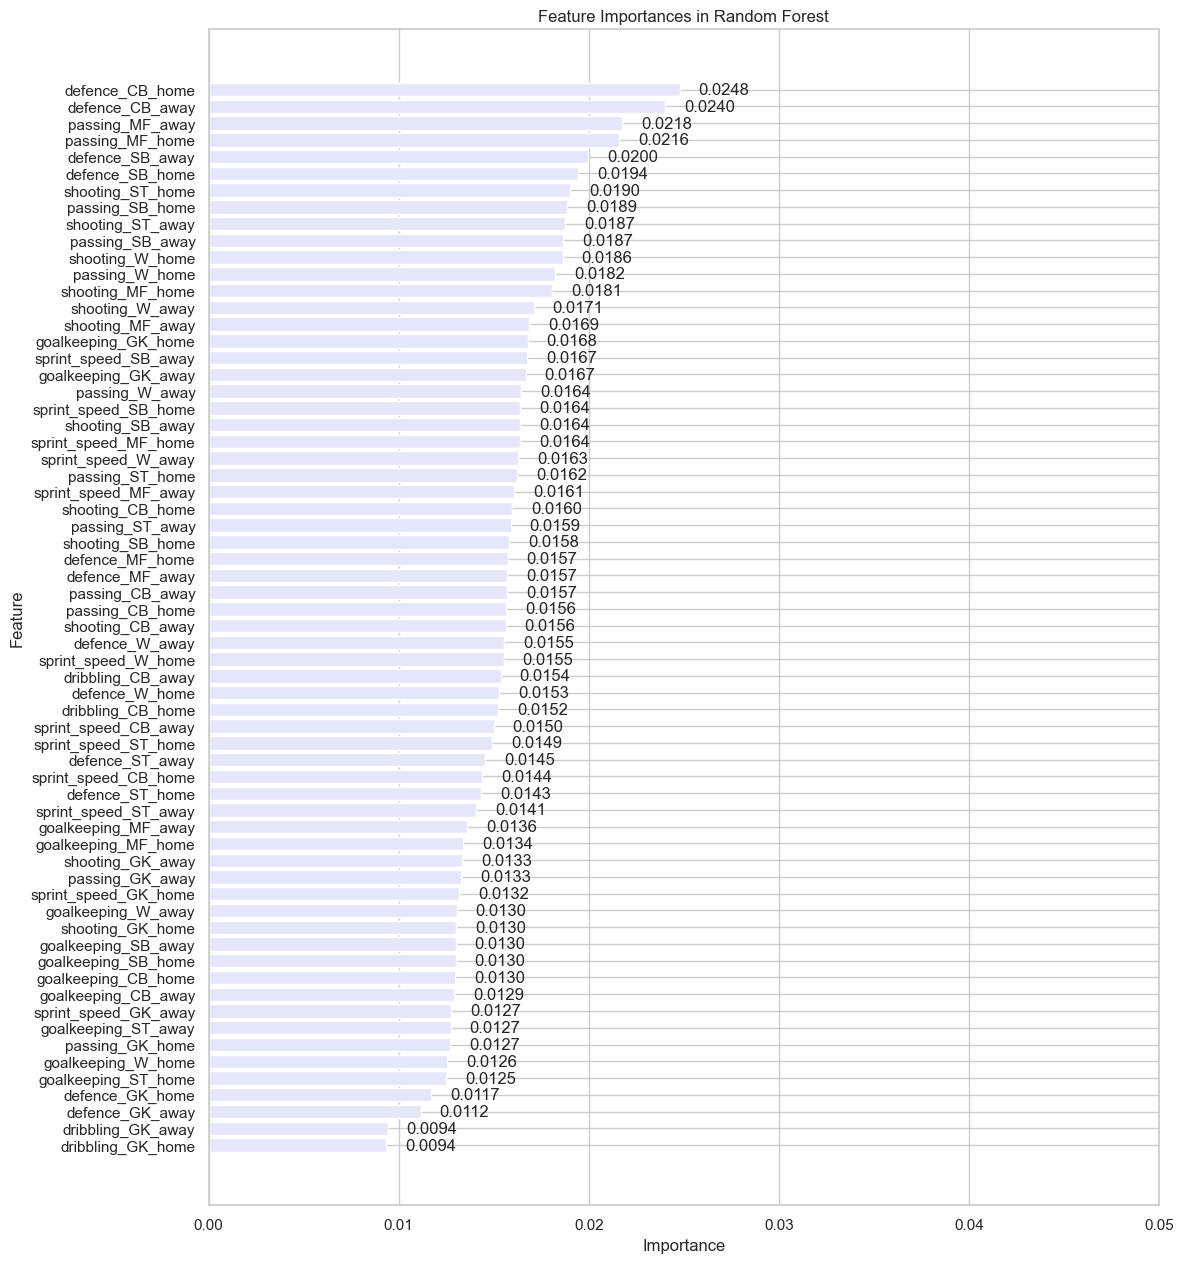

In [137]:
# Check feature importance
importance_df = get_importance(model_df1, 'result')

In [138]:
list(importance_df[importance_df['Importance'] < 0.015]['Feature'])

['sprint_speed_CB_away',
 'sprint_speed_ST_home',
 'defence_ST_away',
 'sprint_speed_CB_home',
 'defence_ST_home',
 'sprint_speed_ST_away',
 'goalkeeping_MF_away',
 'goalkeeping_MF_home',
 'shooting_GK_away',
 'passing_GK_away',
 'sprint_speed_GK_home',
 'goalkeeping_W_away',
 'shooting_GK_home',
 'goalkeeping_SB_away',
 'goalkeeping_SB_home',
 'goalkeeping_CB_home',
 'goalkeeping_CB_away',
 'sprint_speed_GK_away',
 'goalkeeping_ST_away',
 'passing_GK_home',
 'goalkeeping_W_home',
 'goalkeeping_ST_home',
 'defence_GK_home',
 'defence_GK_away',
 'dribbling_GK_away',
 'dribbling_GK_home']

In [139]:
# Drop features with importance less than 0.015
col_to_drop = list(importance_df[importance_df['Importance'] < 0.015]['Feature'])

In [151]:
model_df1 = model_df1.drop(columns = col_to_drop)

              precision    recall  f1-score   support

        lose       0.47      0.46      0.47      1158
         tie       0.29      0.04      0.07      1027
         win       0.54      0.80      0.65      1895

    accuracy                           0.51      4080
   macro avg       0.43      0.43      0.39      4080
weighted avg       0.46      0.51      0.45      4080



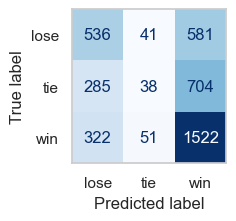

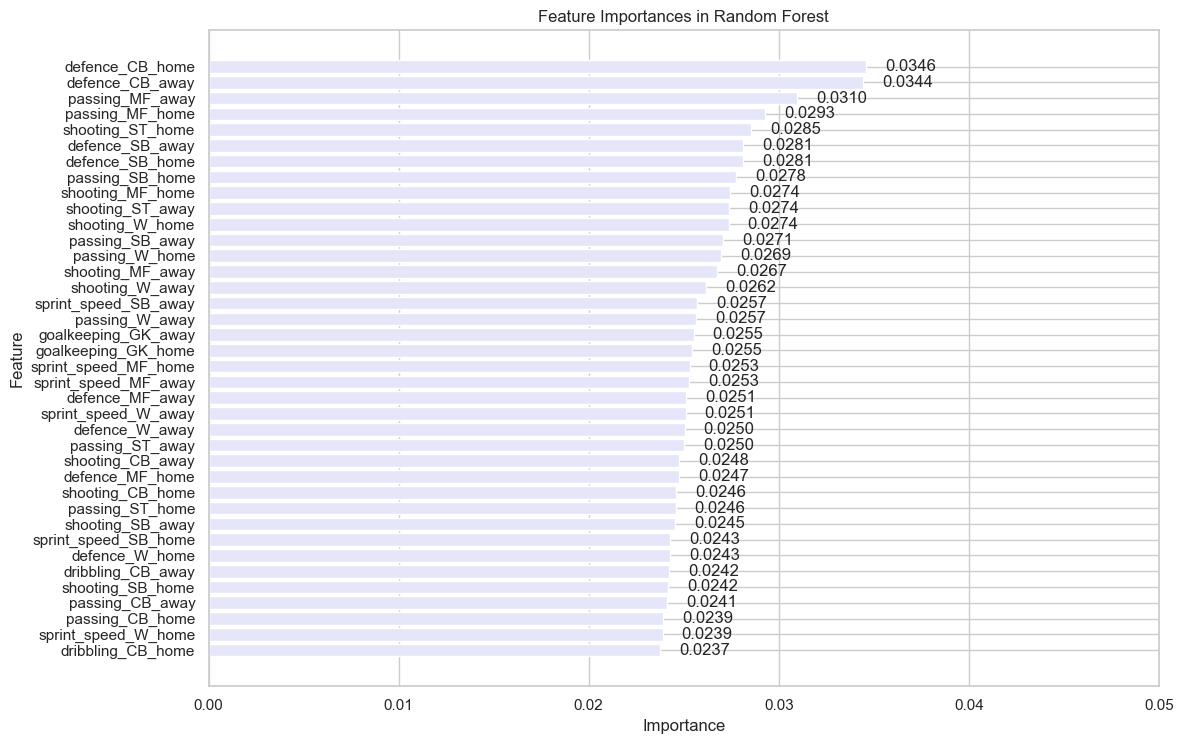

In [141]:
importance_df = get_importance(model_df1, 'result')

In [152]:
X = model_df1.drop(columns = 'result')

In [158]:
num_bins = 6
bin_labels = [0, 1, 2, 3, 4, 5]

# Create a new DataFrame to hold the binned data
model_df1_bin = model_df1.copy()

bin_edges_dict = {}

for col in X.columns:
    # Calculate mean and standard deviation
    mean = model_df1[col].mean()
    std = model_df1[col].std()
    
    # Define bin edges based on the mean and standard deviation
    bin_edges = [mean - 3 * std] + [mean - std] + [mean] + [mean + std] + [mean + 3 * std]
    
    # Assign bin labels based on the bin edges
    model_df1_bin[col] = np.searchsorted(bin_edges, model_df1[col])
    
    bin_edges_dict[col] = bin_edges

In [157]:
model_df1_bin.head()

,dribbling_CB_home,sprint_speed_MF_home,sprint_speed_SB_home,sprint_speed_W_home,passing_CB_home,passing_MF_home,passing_SB_home,passing_ST_home,passing_W_home,shooting_CB_home,shooting_MF_home,shooting_SB_home,shooting_ST_home,shooting_W_home,defence_CB_home,defence_MF_home,defence_SB_home,defence_W_home,goalkeeping_GK_home,dribbling_CB_away,sprint_speed_MF_away,sprint_speed_SB_away,sprint_speed_W_away,passing_CB_away,passing_MF_away,passing_SB_away,passing_ST_away,passing_W_away,shooting_CB_away,shooting_MF_away,shooting_SB_away,shooting_ST_away,shooting_W_away,defence_CB_away,defence_MF_away,defence_SB_away,defence_W_away,goalkeeping_GK_away,result
0,3,4,3,2,3,4,2,3,3,3,4,3,2,4,3,3,4,5,4,1,3,3,2,2,3,3,2,3,2,2,2,2,3,2,4,2,4,3,win
1,1,3,0,1,2,2,1,2,2,2,1,1,3,2,2,1,1,4,2,2,4,2,1,4,1,2,1,1,4,1,4,3,2,2,3,2,2,2,win
2,4,3,3,3,4,4,4,4,4,4,4,4,4,3,3,2,3,4,4,3,3,2,2,4,2,2,2,1,4,2,2,0,3,3,3,3,2,3,win
3,1,4,0,1,2,2,1,3,2,2,2,1,2,1,2,1,1,4,0,3,3,3,2,2,4,3,2,4,2,3,4,2,1,3,3,3,4,4,win
4,3,3,1,3,4,2,1,1,3,3,2,2,2,4,4,3,0,2,3,3,4,4,1,4,3,3,3,2,3,4,4,2,3,3,3,3,4,2,tie


In [161]:
model_df1_bin['result'] = model_df1_bin['result'].replace({'win': 2, 'tie': 1, 'lose':0})
model_df1_bin['result'] = model_df1_bin['result'].astype('category')

In [76]:
lr_pipeline = Pipeline([('lr', LogisticRegression())])
rf_pipeline = Pipeline([('rf', RandomForestClassifier())])
nb_pipeline = Pipeline([('nb', GaussianNB())])
xgb_pipeline = Pipeline([('xgb', XGBClassifier())])

pipelines = [lr_pipeline, rf_pipeline, nb_pipeline, xgb_pipeline]

In [162]:
def get_best_model(df, target, scale = True, oversampler = False):
    '''
    Train multiple classifier model on the given DataFrame `df` to predict the specified `target` column. 
    Print accuracy score of all models and print the confusion matrix of the one with highest score.   
    
    Args: df(dataframe): dataframe in format that fits models in pipelines
          target(string): dependent variable    
          scale(boolean): scaler or not
          oversampler(boolean): oversampler or not
    '''    
    
    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=target), 
                                                    df[target], test_size=0.25, 
                                                    random_state=47)
    
    X_train, y_train = drop_outlier(X_train, y_train, 4)
    
    if scale == True:
        scaler = MinMaxScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test= scaler.transform(X_test)
    
    if oversampler == True:
        oversampler = SMOTE(sampling_strategy='auto', random_state=42)
        X_train, y_train = oversampler.fit_resample(X_train, y_train)
    

    fig, axes = plt.subplots(1, 4, figsize=(16, 5))
    fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

    for pipeline, ax in zip(pipelines, axes.flatten()):
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        model_name = pipeline.steps[-1][1].__class__.__name__
        
        print(model_name)
        print(classification_report(y_test, y_pred))
        cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)

        # Plot the confusion matrix horizontally
        disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False)
        ax.grid(False)
        ax.set_title(f'Confusion Matrix - {model_name}')

    plt.tight_layout()
    plt.show()

LogisticRegression
              precision    recall  f1-score   support

           0       0.45      0.55      0.49      1158
           1       0.28      0.25      0.26      1027
           2       0.61      0.56      0.59      1895

    accuracy                           0.48      4080
   macro avg       0.45      0.45      0.45      4080
weighted avg       0.48      0.48      0.48      4080

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.44      0.51      0.47      1158
           1       0.29      0.22      0.25      1027
           2       0.59      0.61      0.60      1895

    accuracy                           0.48      4080
   macro avg       0.44      0.45      0.44      4080
weighted avg       0.47      0.48      0.47      4080

GaussianNB
              precision    recall  f1-score   support

           0       0.46      0.43      0.44      1158
           1       0.26      0.33      0.29      1027
           2       0.5

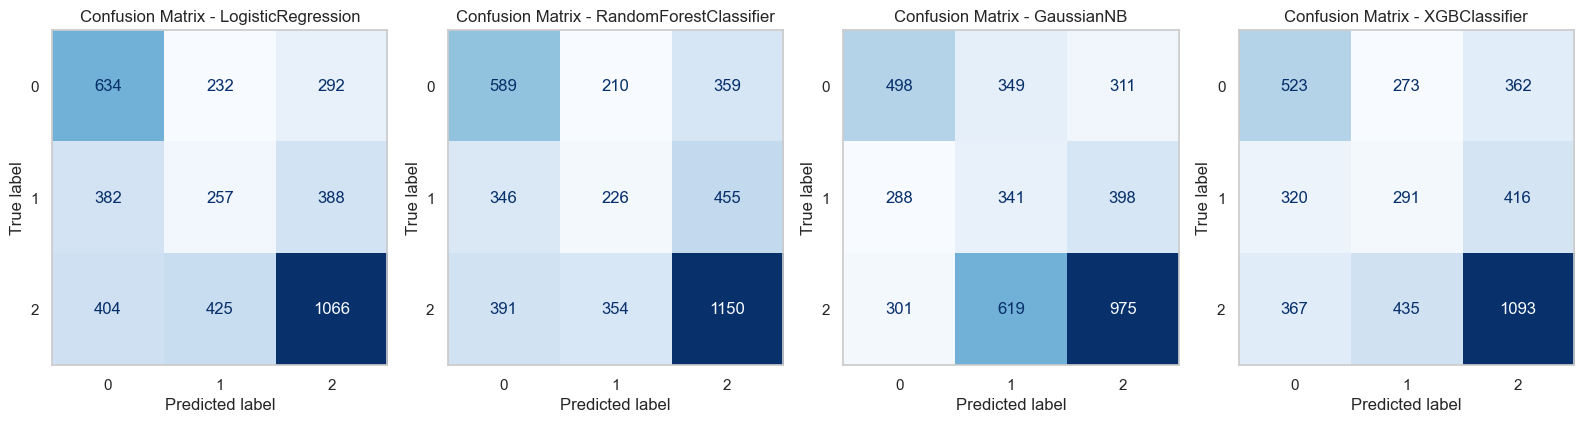

In [164]:
get_best_model(model_df1_bin, 'result', scale = False, oversampler = True)

In [32]:
def logistic_Grid_CV(df, target, scale = True, oversampler = False):
    '''
    Train logistic regression model and execute GridSearch on the given DataFrame `df` to predict the specified `target` column. 
    Print the confusion matrix.   
    
    Args: df(dataframe): dataframe in format that fits logistic regression model.
          target(string): dependent variable    
          scale(boolean): scaler or not
          oversampler(boolean): oversampler or not
    '''   
    
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop(columns=target), df[target], test_size=0.25, random_state=47)

    if scale == True:
        scaler = MinMaxScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test= scaler.transform(X_test)
    
    if oversampler == True:
        oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
        X_train, y_train = oversampler.fit_resample(X_train, y_train)
        
    param_grid = {
        'C': [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0],
        'penalty': ['l1', 'l2'],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'max_iter': [100, 200, 500, 1000],
        'class_weight': [None, 'balanced'],
    }

    logistic_model = LogisticRegression() 
    grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring=make_scorer(accuracy_score))
    grid_search.fit(X_train, y_train)
    
    best_params = grid_search.best_params_
    print("Best hyperparameters:", best_params)
    best_logistic_model = grid_search.best_estimator_

    y_pred = best_logistic_model.predict(X_test)
    
    print(classification_report(y_test,y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=best_logistic_model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_logistic_model.classes_)

    fig, ax = plt.subplots(figsize=(2, 2))  
    disp.plot(ax=ax,cmap=plt.cm.Blues, colorbar = False)  
    plt.grid(False)
    plt.show() 

In [165]:
logistic_Grid_CV(model_df1, 'result', scale = False, oversampler = True)

KeyboardInterrupt: 

#### Train on model with feature engineering which reflect paired advantages

In [34]:
model_df2 = pd.read_csv('../dataset/model_df2.csv')

In [35]:
print(model_df2.shape)
model_df2.head()

(16187, 10)


,result,offence_box_adv,offence_GK_adv,defence_box_adv,defence_GK_adv,offence_pass_adv,offence_move_adv,defence_pass_adv,defence_move_adv,offence_misc_adv
0,win,0.991337,0.903061,1.188616,1.213864,1.070371,1.055491,1.129365,0.939151,1.111281
1,win,0.986403,0.948087,0.958295,1.124031,0.857672,1.019841,1.031083,0.659104,1.009207
2,win,1.034116,0.974389,1.463961,1.603912,1.085814,1.315606,1.202458,1.028301,1.187167
3,tie,0.899281,1.003717,0.985615,1.219231,0.815437,1.097571,0.919066,0.803688,0.880322
4,lose,0.955704,0.868966,1.185132,1.311599,0.972593,1.392121,1.130798,0.979385,1.015217


              precision    recall  f1-score   support

        lose       0.48      0.46      0.47      1191
         tie       0.23      0.06      0.09       979
         win       0.55      0.78      0.65      1877

    accuracy                           0.51      4047
   macro avg       0.42      0.43      0.40      4047
weighted avg       0.45      0.51      0.46      4047



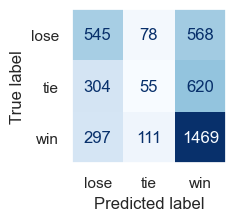

            Feature  Importance
0  offence_misc_adv    0.128479
1  offence_pass_adv    0.121703
2  defence_pass_adv    0.118543
3   offence_box_adv    0.110660
4   defence_box_adv    0.106864
5    offence_GK_adv    0.105659
6  defence_move_adv    0.103877
7  offence_move_adv    0.103140
8    defence_GK_adv    0.101076


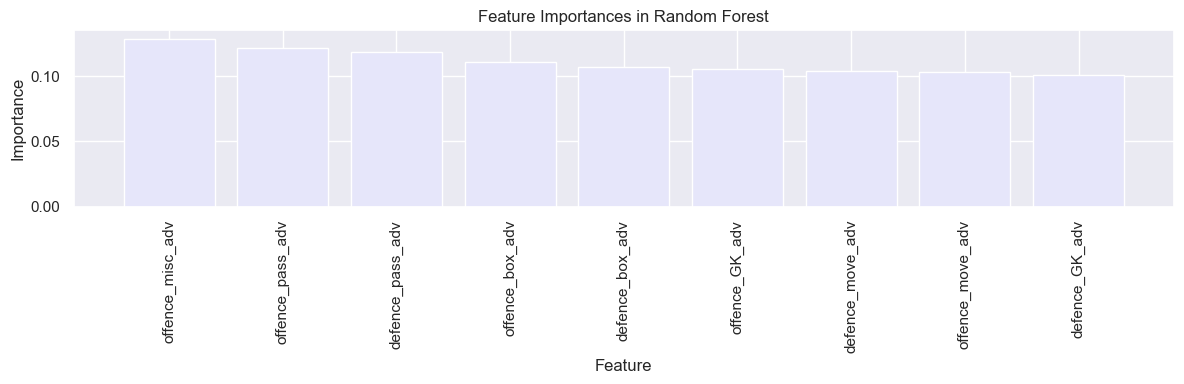

In [36]:
get_importance(model_df2, 'result')

The distribution of importance are close to each other

In [37]:
model_df2['result'] = model_df2['result'].replace({'win': 2, 'tie': 1, 'lose':0})
model_df2['result'] = model_df2['result'].astype('category')

In [38]:
X = model_df2.drop(columns = 'result')

bin_edges_dict = {}
num_bins = 20
bin_labels = range(20)
for col in X.columns:
    model_df2[col], bin_edges = pd.qcut(model_df2[col], labels = bin_labels, 
                                            q=num_bins, retbins=True)
    bin_edges_dict[col] = bin_edges
    #bin_edge_df = pd.DataFrame(zip(bin_edges, bin_labels), columns=['Threshold', 'Tier'])
    #print(bin_edge_df)

LogisticRegression
              precision    recall  f1-score   support

           0       0.44      0.59      0.51      1191
           1       0.29      0.18      0.22       979
           2       0.62      0.61      0.62      1877

    accuracy                           0.50      4047
   macro avg       0.45      0.46      0.45      4047
weighted avg       0.49      0.50      0.49      4047

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.45      0.48      0.46      1191
           1       0.25      0.14      0.18       979
           2       0.58      0.69      0.63      1877

    accuracy                           0.49      4047
   macro avg       0.43      0.44      0.43      4047
weighted avg       0.46      0.49      0.47      4047

GaussianNB
              precision    recall  f1-score   support

           0       0.44      0.60      0.51      1191
           1       0.28      0.17      0.21       979
           2       0.6

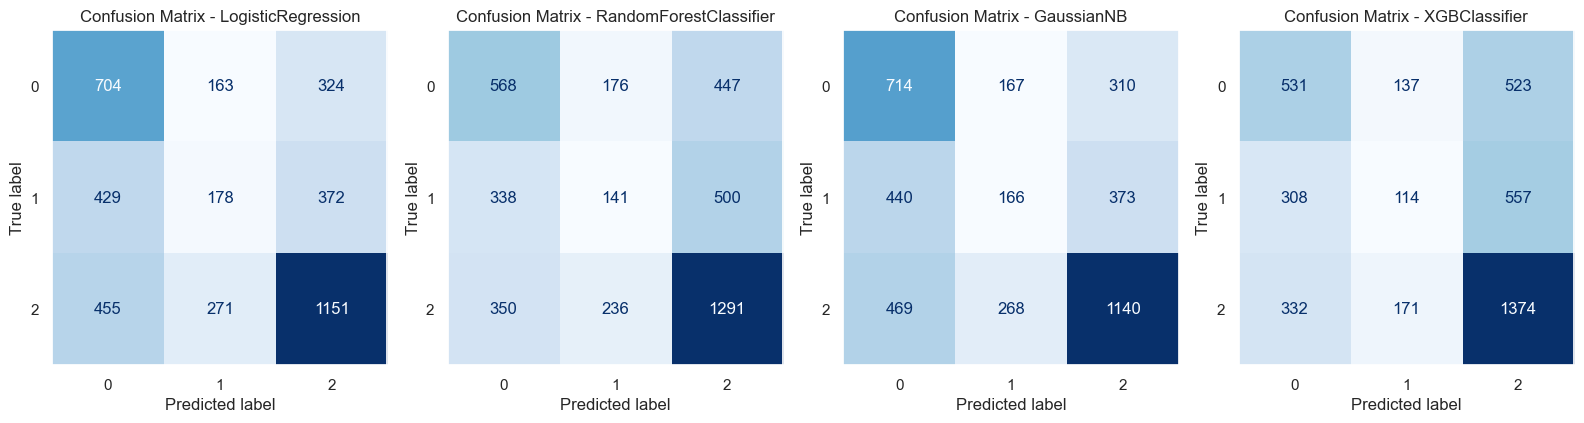

In [39]:
get_best_model(model_df2, 'result', oversampler = True)

Best hyperparameters: {'C': 0.01, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.45      0.59      0.51      1191
           1       0.29      0.18      0.22       979
           2       0.62      0.62      0.62      1877

    accuracy                           0.50      4047
   macro avg       0.45      0.46      0.45      4047
weighted avg       0.49      0.50      0.49      4047



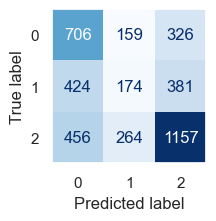

In [40]:
logistic_Grid_CV(model_df2, 'result', oversampler = True)

Summary: 

- The model with engineered features that reflect paired advantage performs similiar with the model with plain stats
- For the plain stats model, the most important features are: defence_CB_home, passing_MF_away, passing_MF_home,
  defence_CB_away, shooting_ST_away, defence_SB_home, shooting_ST_home, defence_SB_away, passing_SB_away, passing_SB_home,  passing_W_home
- For the engineered model, the most important features are: offence_misc_adv, offence_pass_adv, defence_pass_adv, offence_box_adv